In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris_df=pd.read_csv('../Machine_Learning/Datasets/iris.csv')

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## #Data Visualization

<Figure size 576x432 with 0 Axes>

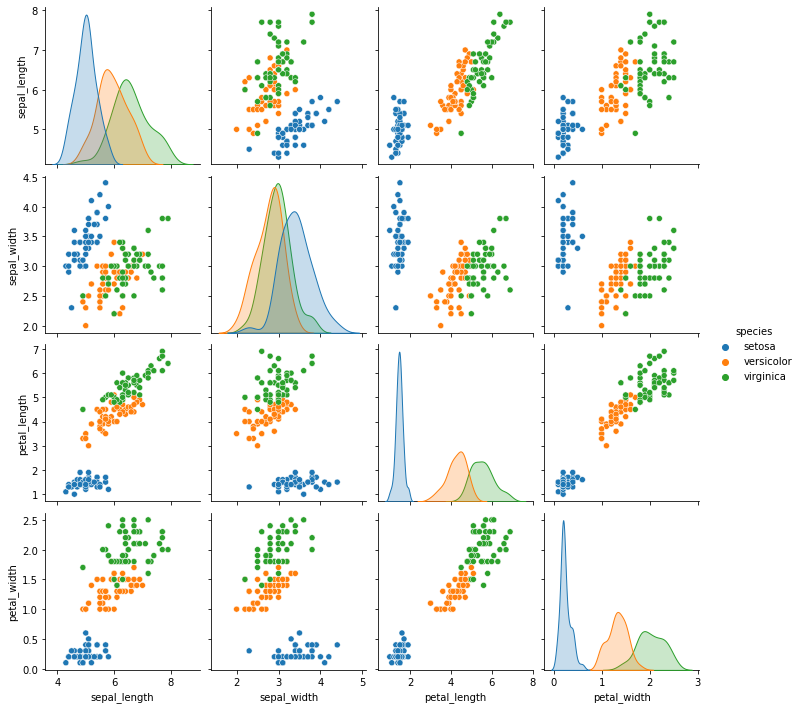

In [10]:
plt.figure(figsize=(8,6))
sns.pairplot(iris_df,hue='species')
plt.show()

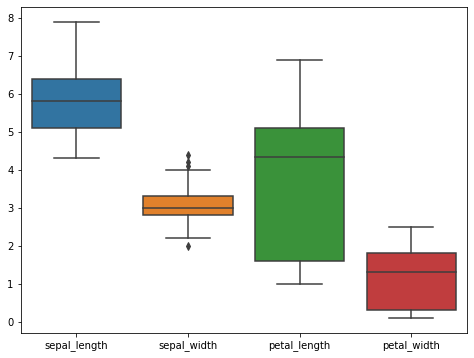

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=iris_df)
plt.show()

## #3D plot

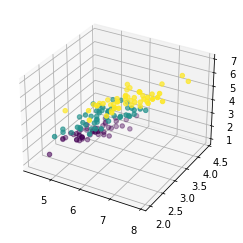

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_df['sepal_length'],iris_df['sepal_width'],iris_df['petal_length'],c=iris_df['species'])


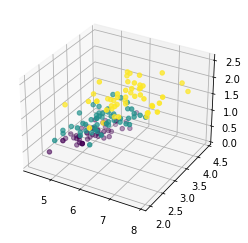

In [62]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_df['sepal_length'],iris_df['sepal_width'],iris_df['petal_width'],c=iris_df['species'])


## #Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
iris_df['species']=label.fit_transform(iris_df['species'])

In [20]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## #logesticRegression(multiclass)

In [22]:
X=iris_df[['sepal_length','sepal_width','petal_length','petal_width']].values
y=iris_df['species']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

## #Feature Scaling Using StandardScalar

In [24]:
from sklearn.preprocessing import StandardScaler
stdSclar = StandardScaler()
sclar_Xtrain = stdSclar.fit_transform(X_train)
sclar_Xtest = stdSclar.transform(X_test)

## #Model Build

In [29]:
from sklearn.linear_model import LogisticRegression
ml_model = LogisticRegression()
ml_model.fit(sclar_Xtrain,y_train)

LogisticRegression()

In [31]:
#prediction
y_pred = ml_model.predict(sclar_Xtest)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## #Performance Evaluation And Accuracy Checks

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
#Accuracy Of Model
accuracy_score(y_test,y_pred)

0.9777777777777777

In [35]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [37]:
#report of model prediction
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## #Performance Evaluation Using GridSearchCV for Best parameters

In [38]:
## Performance testing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
mlog_model1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=1000)


In [53]:
penalty=['l1','l2']
C=np.logspace(0,10,5)
l1_ratio=[0.01,0.1,1.0,0.99,100.,.75]
grid_model=GridSearchCV(mlog_model1,param_grid={'C':C,'penalty':penalty})
grid_model.fit(sclar_Xtrain,y_train)


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

GridSearchCV(estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'penalty': ['l1', 'l2']})

In [57]:
#best paramter
grid_model.best_params_

{'C': 316.22776601683796, 'penalty': 'l2'}

In [58]:
y_gridpredict = grid_model.predict(sclar_Xtest)
accuracy_score(y_test,y_gridpredict)

0.9777777777777777